In [1]:
# import data
# TODO: clean data
# standardize data

# Original Community
# Fig1a. Community analysis genus level (bar chart)
# Fig1b. Community analysis phylum level (bar chart)

# Composition shift with change of carbon source (bar charts)
# Fig2a. Glucose
# Fig2b. Malate

# Effects of Perturbation

# General
# Fig3. PCoA (scatterplot)

# Effects on Network Generalist-Specialist
# Fig4a. Generalist-Specialist (network)
# Fig4b. Generalist-Specialist (scatterplot)

# Effects on state transitions, time series data
# Fig5. Topological Map

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Process Data

We are working with three files:
* `<counts>.csv`: OTUs x sample
* `<annotations>.csv`: sample x variables
* `<taxonomy>.csv`: OTUs x taxonomy

OTUs and samples must be in the same order for all files

In [3]:
df_counts_raw = pd.read_csv("data/FCF_master.csv", index_col=0).T
df_annotations = pd.read_csv("data/FCF_annotations.csv", index_col=0)

In [4]:
print("df_counts_raw.shape", df_counts_raw.shape)
df_counts_raw.head()

df_counts_raw.shape (87, 153)


,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,bosea spp.,corynebacterium durum,rubrivivax gelatinosus,anaerococcus hydrogenalis,globicatella spp.,finegoldia magna,dietzia spp.,granulicatella elegans,actinomyces marimammalium,veillonella dispar
C0C,18304,16452,9817,9279,6578,6400,5409,4521,3913,1958,...,0,0,0,0,0,0,0,0,0,0
1C3A,19239,4060,13664,9191,902,1891,3647,2798,1163,257,...,0,0,0,0,0,0,0,0,0,0
1C3B,34155,6121,19194,13838,1395,3117,4828,3858,1357,221,...,0,0,1,0,0,0,0,0,0,0
1C5A,16237,1967,24640,8188,720,1520,2641,2308,2046,265,...,0,0,1,0,0,0,0,0,0,0
1C5B,23247,6002,16356,16142,1381,4462,6110,4695,3101,605,...,0,1,0,0,0,0,0,0,0,0


In [5]:
print("df_annotations.shape", df_annotations.shape)
df_annotations.head()

df_annotations.shape (87, 3)


,series,food,day
C0C,C0,cellulose,10
1C3A,1C,cellulose,3
1C3B,1C,cellulose,3
1C5A,1C,cellulose,5
1C5B,1C,cellulose,5


In [32]:
df_annotations.index

Index(['C0C', '1C3A', '1C3B', '1C5A', '1C5B', '1C7A', '1C7B', '1C10A', '1C10B',
       '1C20B', '1C20A', '2C3A', '2C3B', '2C5A', '2C5B', '2C10A', '2C10B',
       '1M3A', '1M3B', '1M3C', '1M5C', '1M5A', '1M5B', '1M7A', '1M7B', '1M7C',
       '1M10A', '1M10B', '1M10C', '2M3A', '2M3B', '2M3C', '2M5A', '2M5B',
       '2M7A', '2M7B', '2M7C', '2M10B', '2M10A', '2M10C', '3M3A', '3M3B',
       '3M3C', '3M5A', '3M5B', '3M5C', '3M7A', '3M7B', '3M7C', '3M10A',
       '3M10B', '3M10C', '1G3A', '1G3B', '1G3C', '1G5A', '1G5B', '1G5C',
       '1G7A', '1G7B', '1G7C', '1G10A', '1G10B', '1G10C', '2G3A', '2G3B',
       '2G3C', '2G5A', '2G5B', '2G5C', '2G7A', '2G7B', '2G7C', '2G10A',
       '2G10B', '2G10C', '3G3A', '3G3B', '3G3C', '3G5A', '3G5B', '3G5C',
       '3G7A', '3G7B', '3G7C', '3G10A', '3G10B'],
      dtype='object')

### Remove noisy data (OTUs that do not appear consistently)

* TODO: remove 1G10C because it might be a wrongly labeled result
* remove OTUs not in original sample
* TODO: remove OTUs with less than threshold read counts

In [46]:
# remove 1G10C because it might be a wrongly labeled result
df_counts_raw.drop(['1G10C'], inplace=True)

KeyError: "['1G10C'] not found in axis"

In [47]:
# remove OTUs not in original sample
threshold = 1
not_in_original = df_counts_raw.columns[df_counts_raw.loc['C0C'] < threshold]
# --- what OTUs are not in original sample?
print("not in origianl C0C community:", not_in_original)
df_not_in_original = df_counts_raw[not_in_original]
df_not_in_original.sum(axis=0)

not in origianl C0C community: Index(['pseudomonas veronii', 'streptococcus salivarius',
       'stenotrophomonas spp.', 'zoogloea sp.', 'bordetella hinzii',
       'cytophaga spp.', 'rhizobium straminoryzae', 'methanosaeta sp.',
       'pontibacter korlensis', 'bacteroides fragilis',
       'sphingobium yanoikuyae', 'rhodothermus spp.', 'rhodovibrio sodomensis',
       'rhizobium sp.', 'enterobacter sp.', 'gemmatimonas spp.',
       'bacteroides caccae', 'eubacterium rectale', 'citrobacter sp.',
       'pseudomonas spp.', 'hydrogenophaga spp.', 'atopostipes sp.',
       'rhodovibrio spp.', 'ochrobactrum intermedium',
       'pseudochrobactrum kiredjianiae', 'steroidobacter spp.',
       'oligotropha carboxidovorans', 'salinibacter spp.',
       'pantoea agglomerans', 'chelatococcus spp.', 'streptococcus sanguinis',
       'afipia broomeae', 'prevotella sp.', 'thioalkalivibrio spp.',
       'methyloligella halotolerans', 'rhodopseudomonas oryzae',
       'porphyromonas spp.', 'methyloc

pseudomonas veronii          4119
streptococcus salivarius     2503
stenotrophomonas spp.         114
zoogloea sp.                   62
bordetella hinzii              29
                             ... 
finegoldia magna                4
dietzia spp.                    4
granulicatella elegans          4
actinomyces marimammalium       3
veillonella dispar              3
Length: 84, dtype: int64

In [49]:
df_counts = df_counts_raw.drop(not_in_original, axis=1)
df_counts

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,escherichia vulneris,brevundimonas spp.,parabacteroides distasonis,nitrobacter hamburgensis,vitis vinifera,methylocystis heyerii,micrococcus luteus,delftia sp.,methylobacillus sp.,rhodobacter capsulatus
C0C,18304,16452,9817,9279,6578,6400,5409,4521,3913,1958,...,1,1,1,1,1,1,1,1,1,1
1C3A,19239,4060,13664,9191,902,1891,3647,2798,1163,257,...,0,0,0,0,0,0,0,0,0,0
1C3B,34155,6121,19194,13838,1395,3117,4828,3858,1357,221,...,2,0,0,0,1,0,0,0,0,0
1C5A,16237,1967,24640,8188,720,1520,2641,2308,2046,265,...,5,8,0,2,0,0,0,0,0,0
1C5B,23247,6002,16356,16142,1381,4462,6110,4695,3101,605,...,10,2,1,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3G7A,25593,319,3256,11598,10247,69747,28315,891,7625,15,...,5,0,3,0,0,1,0,0,0,0
3G7B,36316,109,3496,7593,9236,40432,30320,703,3922,15,...,7,0,0,0,0,0,0,0,0,0
3G7C,34948,136,4123,9157,12384,40225,28382,721,4594,16,...,2,5,1,0,0,2,0,0,0,0
3G10A,17610,250,18156,16920,8832,72267,27647,1603,9659,1,...,0,0,5,0,0,1,0,0,0,0


### Standardize Data

Transform absolute counts to relative abundances.
Relative counts for a sample should add up to 1.
Do this by dividing counts in each sample by total counts in sample.

In [51]:
df_counts_rel = df_counts.div(df_counts.sum(axis=1), axis=0)
df_counts_rel.head()

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,escherichia vulneris,brevundimonas spp.,parabacteroides distasonis,nitrobacter hamburgensis,vitis vinifera,methylocystis heyerii,micrococcus luteus,delftia sp.,methylobacillus sp.,rhodobacter capsulatus
C0C,0.207679,0.186666,0.111385,0.105280,0.074635,0.072615,0.061371,0.051296,0.044397,0.022216,...,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011
1C3A,0.267023,0.056350,0.189646,0.127564,0.012519,0.026246,0.050618,0.038834,0.016142,0.003567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1C3B,0.290518,0.052064,0.163261,0.117704,0.011866,0.026513,0.041066,0.032816,0.011542,0.001880,...,0.000017,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000
1C5A,0.194220,0.023528,0.294733,0.097941,0.008612,0.018182,0.031591,0.027607,0.024473,0.003170,...,0.000060,0.000096,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1C5B,0.187921,0.048518,0.132217,0.130487,0.011164,0.036069,0.049391,0.037953,0.025067,0.004891,...,0.000081,0.000016,0.000008,0.000032,0.000008,0.000000,0.000000,0.000000,0.000008,0.000000


In [52]:
# check that samples sum to 1
df_counts_rel.sum(axis=1)

C0C      1.0
1C3A     1.0
1C3B     1.0
1C5A     1.0
1C5B     1.0
        ... 
3G7A     1.0
3G7B     1.0
3G7C     1.0
3G10A    1.0
3G10B    1.0
Length: 86, dtype: float64

## Split Labels

In [53]:
from collections import Counter

In [54]:
original = df_counts_rel.loc['C0C']
labels = original.index
family = [i.split()[0] for i in labels]
species = [i.split()[1] for i in labels]
family_count = Counter(family)

Text(0.5, 1.0, 'C0C: how many species in a family')

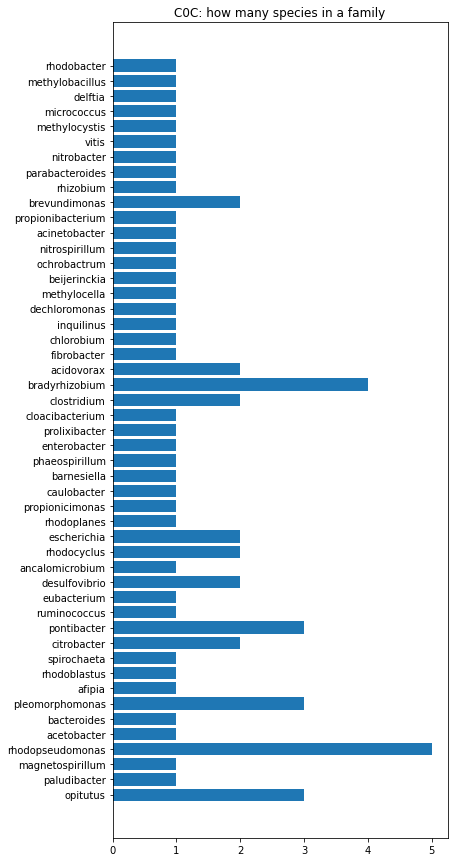

In [55]:
# just get a sense of how many species are in a family
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(list(family_count.keys()), list(family_count.values()))
ax.set_title("C0C: how many species in a family")

## Analyze Data

Make bar charts to:
* Observe original community
* Observe composition shift as effect of carbon perturbation

Text(0.5, 1.0, 'C0C: absolute counts')

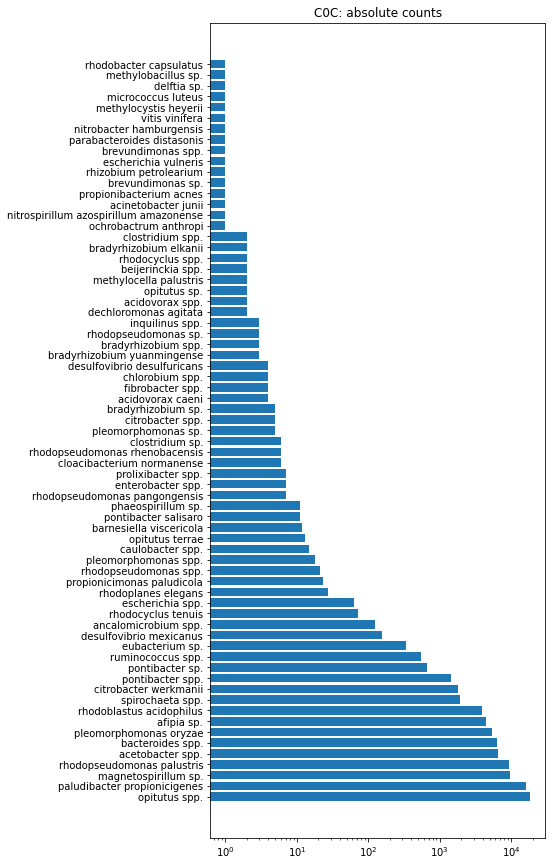

In [56]:
data = df_counts.loc['C0C']

f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data.index, data.values, log=True)
ax.set_title("C0C: absolute counts")

Text(0.5, 1.0, 'C0C: relative counts')

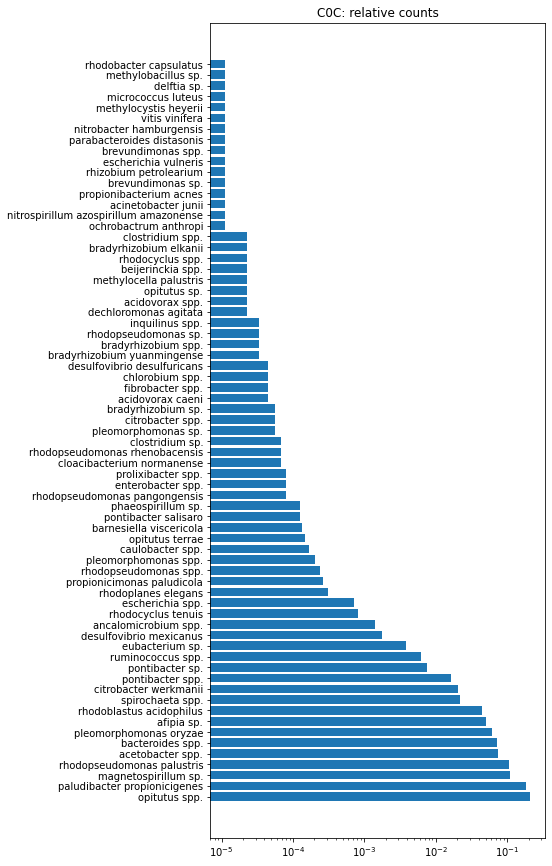

In [57]:
data = df_counts_rel.loc['C0C']

f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data.index, data.values, log=True)
ax.set_title("C0C: relative counts")

Text(0.5, 1.0, 'C0C: relative counts')

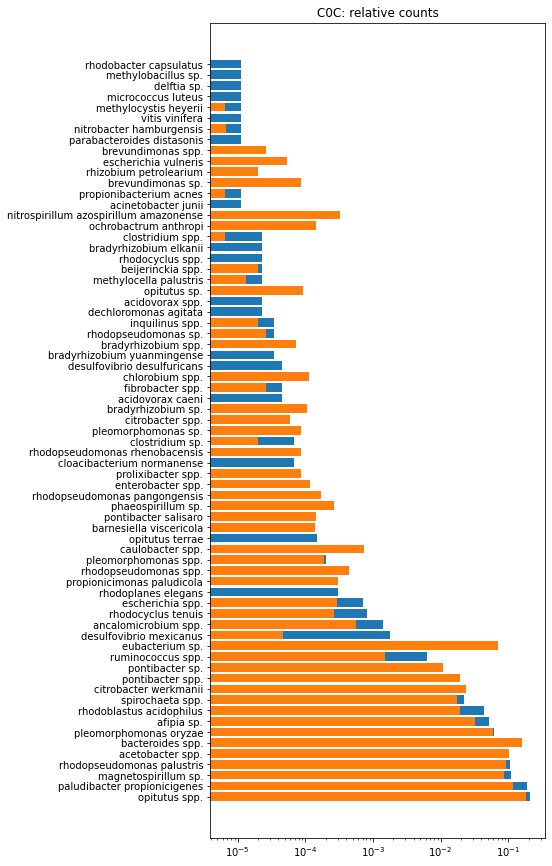

In [63]:
# TODO: make a difference bar plot
data1 = df_counts_rel.loc['C0C']
data2 = df_counts_rel.loc[['1C10A','1C10B']].mean(axis=0)

f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data1.index, data1.values, log=True)
ax.barh(data2.index, data2.values, log=True)
ax.set_title("C0C: relative counts")